       
Z-scores – standardizing values to
compare across variables


·        
Interquartile Range (IQR) – spread of the
middle 50% of data
Cross-tabulation – frequency analysis between categorical
variables

In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\RVU\Data Science\lab3\Rainfall_Data_Germany_Complete.csv")
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


In [19]:
#Measures of central tendency (mean,median, mode)

# Mean temperature grouped by City
city_temp_mean = df.groupby('City')['Temperature (°C)'].mean()
#Median
print(city_temp_mean)
city_temp_median = df.groupby('City')['Rainfall (mm)'].median()

print(city_temp_median)
df['Climate_Type'].mode()

City
Berlin        14.500000
Cologne       14.874074
Dresden       14.555556
Dusseldorf    13.973148
Frankfurt     13.992593
Hamburg       14.989815
Hanover       15.610185
Leipzig       16.041667
Munich        14.453704
Stuttgart     14.251852
Name: Temperature (°C), dtype: float64
City
Berlin         90.705
Cologne       115.550
Dresden       115.975
Dusseldorf     96.910
Frankfurt      86.635
Hamburg       100.485
Hanover        95.125
Leipzig        98.885
Munich         95.790
Stuttgart     100.580
Name: Rainfall (mm), dtype: float64


0    Oceanic
Name: Climate_Type, dtype: object

In [21]:
#Measures of dispersion (variance, stddev, range)
import pandas as pd

# Create temperature bins (you can adjust bin size)
df['Temp_bin'] = pd.cut(df['Temperature (°C)'], bins=range(-10, 41, 5))  # from -10°C to 40°C in steps of 5
# Variance of rainfall for each temp bin
rain_var_by_temp = df.groupby('Temp_bin')['Rainfall (mm)'].var()
print(rain_var_by_temp)

Temp_bin
(-10, -5]    2260.298533
(-5, 0]      3712.881353
(0, 5]       3372.446624
(5, 10]      3415.902668
(10, 15]     3340.083616
(15, 20]     3600.621911
(20, 25]     2966.260731
(25, 30]     3559.195086
(30, 35]     2485.902441
(35, 40]             NaN
Name: Rainfall (mm), dtype: float64


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_131004\397738227.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_var_by_temp = df.groupby('Temp_bin')['Rainfall (mm)'].var()


In [24]:
#Frequency distribution
temp_freq = (
    pd.cut(df['Temperature (°C)'], bins=range(-10, 41, 5))
    .value_counts(sort=False)          # keep bin order
    .reset_index())
temp_freq.columns = ['Temp Range', 'Frequency']   # rename columns
print(temp_freq)



  Temp Range  Frequency
0  (-10, -5]          3
1    (-5, 0]        138
2     (0, 5]        133
3    (5, 10]        128
4   (10, 15]        143
5   (15, 20]        148
6   (20, 25]        134
7   (25, 30]        129
8   (30, 35]        124
9   (35, 40]          0


In [25]:
#Correlation analysis
corr = df['Humidity (%)'].corr(df['Rainfall (mm)'])
print("Correlation between Humidity and Rainfall:", corr)


Correlation between Humidity and Rainfall: 0.014436611100285998


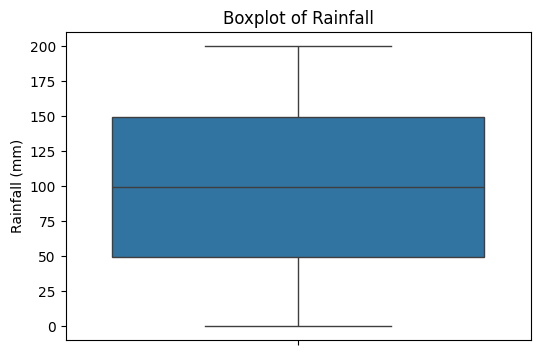

In [ ]:
# Visuals: histogram, boxplot, bar chart,
# pairplot, and heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for rainfall
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Rainfall (mm)'])
plt.title("Boxplot of Rainfall")
plt.ylabel("Rainfall (mm)")
plt.show()




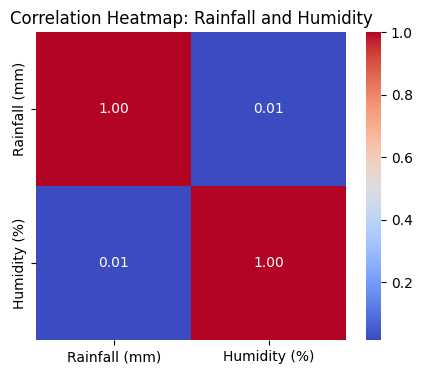

In [ ]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns you want
corr = df[['Rainfall (mm)', 'Humidity (%)']].corr()

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Rainfall and Humidity")
plt.show()
#no corrlation between rain and humidity


In [ ]:
#Skewness – measures asymmetry of distribution
from scipy.stats import skew

# Skewness using scipy
rainfall_skew = skew(df['Rainfall (mm)'], nan_policy='omit')
print("Skewness of Rainfall:", rainfall_skew)


Skewness of Rainfall: 1.893532290229746e-05


In [34]:
#Kurtosis – measures the “peakedness” of the distribution
from scipy.stats import kurtosis

# Kurtosis of rainfall
rainfall_kurt = kurtosis(df['Rainfall (mm)'], fisher=False, nan_policy='omit')
print("Kurtosis of Rainfall:", rainfall_kurt)

# Using pandas
print("Kurtosis (pandas):", df['Rainfall (mm)'].kurt())



Kurtosis of Rainfall: 1.7946838553217688
Kurtosis (pandas): -1.2053387715796


In [37]:
#Percentile
import numpy as np

# Quartiles
q1 = np.percentile(df['Rainfall (mm)'], 25)
q2 = np.percentile(df['Rainfall (mm)'], 50)  # Median
q3 = np.percentile(df['Rainfall (mm)'], 75)

# Other percentiles
p10 = np.percentile(df['Rainfall (mm)'], 10)
p90 = np.percentile(df['Rainfall (mm)'], 90)

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / Median):", q2)
print("Q3 (75th percentile):", q3)
print("10th percentile:", p10)
print("90th percentile:", p90)


Q1 (25th percentile): 49.5
Q2 (50th percentile / Median): 99.42500000000001
Q3 (75th percentile): 149.5275
10th percentile: 18.518
90th percentile: 177.913


In [38]:
#Coefficient of Variation (CV) – relativemeasure of variability (std dev / mean)
import numpy as np

mean = np.mean(df['Rainfall (mm)'])
std_dev = np.std(df['Rainfall (mm)'])
cv = std_dev / mean

print("Mean Rainfall:", mean)
print("Standard Deviation:", std_dev)
print("Coefficient of Variation (CV):", cv)



Mean Rainfall: 99.21178703703703
Standard Deviation: 57.533794634521016
Coefficient of Variation (CV): 0.5799088631781516
